### Autoencoders
- An autoencoder is a special type of neural network that is trained to copy its input to its output.
- **For example**, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error. 

## Import libraries


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.models import Model

### Load the Dataset

In [2]:
#Loading the inbuild Digits Imaages in mnist dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


### Plot random image

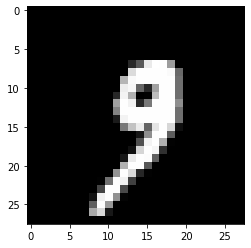

In [ ]:
plt.imshow(x_test[1000])
plt.gray();

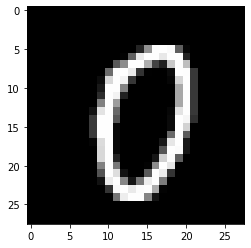

In [ ]:
plt.imshow(x_train[1000])
plt.gray();

### Reshape the Data

In [7]:
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


### There are 4 hyperparameters that we need to set before training an autoencoder:
1. **Code size**: number of nodes in the middle layer. Smaller size results in more compression.
2. **Number of layers**: the autoencoder can be as deep as we like.
3. **Number of nodes per layer**: the autoencoder architecture we’re working on is called a stacked autoencoder since the layers are stacked one after another. Usually stacked autoencoders look like a “sandwitch”. The number of nodes per layer decreases with each subsequent layer of the encoder, and increases back in the decoder. Also the decoder is symmetric to the encoder in terms of layer structure.
4. **Loss function**: we either use mean squared error (mse) or binary crossentropy. If the input values are in the range [0, 1] then we typically use crossentropy, otherwise we use the mean squared error.

In [11]:
#Creating Encoder Layers
input_img= Input(shape=(784,))
encoder=Dense(units=128, activation='relu')(input_img)  # Infusion input_img into ANN 
encoder=Dense(units=64, activation='relu')(encoder)
encoder=Dense(units=32, activation='relu')(encoder)

#Check the Encoded Layers
encoded = Model(input_img, encoder)

#Summary of Encoded Model
encoded.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Creating Decoder Layers
decode=Dense(units=32, activation='relu')(encoder)
decode=Dense(units=64, activation='relu')(decode)
decode=Dense(units=128, activation='relu')(decode)
decode=Dense(units=784, activation='sigmoid')(decode)

#Create Final autoencoder model
autoencoder=Model(input_img, decode)

#Summary of AutoEncoded model
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_23 (Dense)            (None, 128)               100480    
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 64)                2112      
                                                                 
 dense_36 (Dense)            (None, 128)               8320

### Compile the Autoencoded Model

In [15]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Fit and Train the model
- Train the model using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from 784 dimensions to the latent space, and the `decoder` will learn to reconstruct the original images.

In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1027 - accuracy: 0.0131 - val_loss: 0.1011 - val_accuracy: 0.0127
Epoch 2/50
235/235 [==============================] - 6s 27ms/step - loss: 0.1015 - accuracy: 0.0125 - val_loss: 0.0998 - val_accuracy: 0.0132
Epoch 3/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1004 - accuracy: 0.0132 - val_loss: 0.0989 - val_accuracy: 0.0146
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0995 - accuracy: 0.0132 - val_loss: 0.0980 - val_accuracy: 0.0095
Epoch 5/50
235/235 [==============================] - 6s 28ms/step - loss: 0.0986 - accuracy: 0.0138 - val_loss: 0.0971 - val_accuracy: 0.0121
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0977 - accuracy: 0.0128 - val_loss: 0.0963 - val_accuracy: 0.0107
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.0969 - accuracy: 0.0133 - val_loss: 0.0955 - val_accuracy: 0.0123

### Check the Original, Encoded and final Decoded Image

In [19]:
encoded_imgs = encoded.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 5ms/step


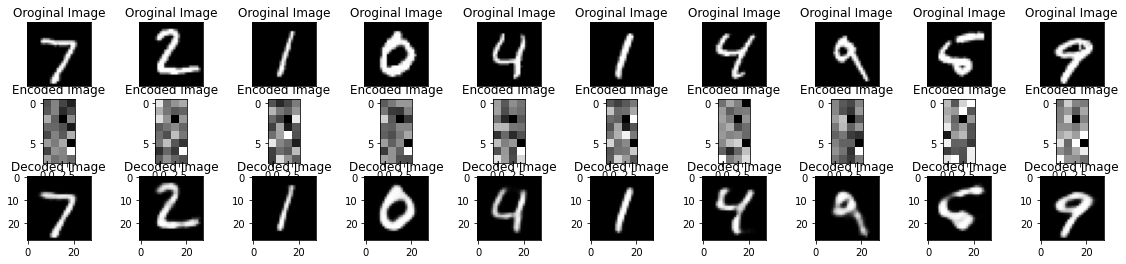

In [32]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax=plt.subplot(3,20, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Oroginal Image")
    
    plt.subplot(3,20, i+1+20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Encoded Image")
    
    plt.subplot(3,20, i+1+2*20)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Decoded Image") 
plt.show()